## 선형 분류기 훈련

In [1]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
iris = datasets.load_iris()

In [39]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
features = iris.data[:100,:2]
target = iris.target[:100]

In [4]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [5]:
# 서포트 벡터 분류기
svc = LinearSVC(C=1.0)

In [6]:
# 모델 훈련
model = svc.fit(features_standardized, target)

In [7]:
from matplotlib import pyplot as plt

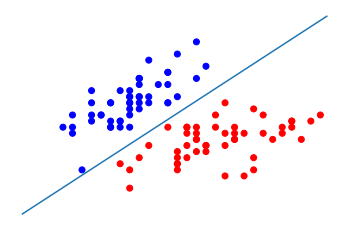

In [8]:
# 클래스를 색으로 구분한 산점도 그리기
color = ["blue" if c==0 else "red" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# 초평면 만들기
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a*xx-(svc.intercept_[0]) / w[1]

# 초평면 그리기
plt.plot(xx, yy)
plt.axis("off"), plt.show();

- 클래스 0의 샘플은 파란색이고 클래스 1의 샘플은 빨간색
- 초평면은 새로운 샘플을 분류하기 위한 결정 경계

In [9]:
new_observation = [[-2,3]]
svc.predict(new_observation)

array([0])

## 커널을 사용해 선형적으로 구분되지 않는 클래스 다루기

In [10]:
from sklearn.svm import SVC

In [11]:
np.random.seed(0)
features = np.random.randn(200,2)

In [12]:
# XOR 연산을 사용하여 선형적으로 구분할 수 없는 클래스를 만듬
target_xor = np.logical_xor(features[:,0]>0, features[:,1]>0)
target = np.where(target_xor, 0, 1)

In [13]:
# 방사 기저 함수 커널을 사용한 서포트 벡터 머신
svc = SVC(kernel = "rbf", random_state=0, gamma=1, C=1)

# 분류기 훈련
model = svc.fit(features, target)

In [17]:
# 샘플과 결정 경계 그리기
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3,3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap.colors[idx], marker="+", label=cl)

In [18]:
# 선형 커널을 사용한 서포트 벡터 분류기
svc_linear = SVC(kernel = "linear", random_state=0, C=1)

svc_linear.fit(features, target)

SVC(C=1, kernel='linear', random_state=0)

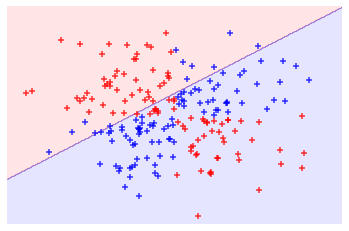

In [19]:
# 샘플과 초평면 그리기
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off")
plt.show()

In [21]:
# 방사 기저 함수 커널을 사용한 서포트 벡터 머신
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
model = svc.fit(features, target)

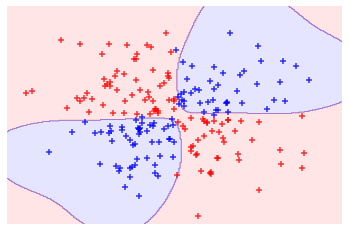

In [22]:
plot_decision_regions(features, target, classifier=svc)
plt.axis("off"),plt.show();

### 예측 확률 계산

In [23]:
from sklearn.svm import SVC

In [24]:
features = iris.data
target = iris.target

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [26]:
svc = SVC(kernel = "linear", probability = True, random_state=0)
model = svc.fit(features_standardized, target)

In [27]:
new_observation = [[.4, .4, .4, .4]]
model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

### 서포트 벡터 식별하기

In [28]:
features = iris.data[:100, :]
target = iris.target[:100]

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [30]:
svc = SVC(kernel="linear", random_state=0)
model = svc.fit(features_standardized, target)

# 서포트 벡터 확인 
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

In [31]:
model.support_

array([23, 41, 57, 98])

In [32]:
model.n_support_

array([2, 2])

### 불균형한 클래스 다루기
- class_weight : 작은 클래스를 잘못 분류했을 때 패널티 증가

In [33]:
featues = iris.data[:100, :]
target = iris.target[:100]

In [34]:
# 처음 40개 샘플을 제거하여 불균형한 클래스를 만듬
features = features[40:, :]
target = target[40:]

In [35]:
# target 벡터에서 0이 아닌 클래스는 모두 1로 만듬
target = np.where((target == 0), 0, 1)

In [36]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [37]:
svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)
model = svc.fit(features_standardized, target)